In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip uninstall transformers
!pip install transformers==4.31.0

Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.10/dist-packages/transformers-4.41.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/transformers/*
Proceed (Y/n)? Y
  Successfully uninstalled transformers-4.41.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFDistilBertModel, DistilBertTokenizer
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
train_data = pd.read_csv('../major.csv')
validation_data = pd.read_csv('../major_validation.csv')

In [ ]:
train_data

,ID,NAMA,PEMINAT 2023,Description,for_who,prospek,Mata Kuliah,Matematika,Sains,Fisika,...,Sastra dan Linguistik,Pendidikan,Lingkungan,Kesehatan,Geografi,Komunikasi,Sejarah dan Filsafat,Hukum,information,highest
0,1,MANAJEMEN,84340.0,MANAJEMEN adalah jurusan yang mempelajari teo...,Jurusan manajemen adalah jurusan bagi orang ya...,1. Manajer\n2. Konsultan\n3. Analis bisnis,1. Manajemen Keuangan\n2. Manajemen Sumber Day...,0.3,0.0,0.0,...,0.1,0.1,0.1,0.1,0.1,0.5,0.1,0.1,MANAJEMEN adalah jurusan yang mempelajari teo...,8
1,2,AKUNTANSI,63257.0,Jurusan Akuntansi adalah salah satu jurusan da...,Jurusan Akuntansi adalah jurusan yang cocok un...,1. Akuntan\n2. Auditor\n3. Analis keuangan,1. Akuntansi Keuangan\n2. Akuntansi Biaya\n3. ...,0.6,0.0,0.1,...,0.1,0.1,0.1,0.1,0.1,0.3,0.1,0.4,Jurusan Akuntansi adalah salah satu jurusan da...,1
2,3,ILMU KOMUNIKASI,57627.0,Jurusan Ilmu Komunikasi adalah salah satu jur...,Jurusan Ilmu Komunikasi adalah jurusan yang co...,1. Public Relations Specialist\n2. Communicati...,1. Teori Komunikasi\n2. Jurnalistik\n3. Public...,0.1,0.1,0.1,...,0.3,0.1,0.1,0.1,0.1,0.9,0.1,0.3,Jurusan Ilmu Komunikasi adalah salah satu jur...,16
3,4,PSIKOLOGI,54772.0,Jurusan Psikologi adalah cabang ilmu yang memp...,Jurusan Psikologi adalah jurusan untuk orang y...,1. Psikolog\n2. Konselor\n3. Peneliti psikologi,1. Psikologi Klinis\n2. Psikologi Industri\n3....,0.3,0.4,0.1,...,0.1,0.2,0.3,0.8,0.1,0.3,0.3,0.2,Jurusan Psikologi adalah cabang ilmu yang memp...,14
4,5,ILMU HUKUM,44576.0,Jurusan Ilmu Hukum adalah salah satu jurusan d...,Jurusan Ilmu Hukum adalah jurusan yang cocok u...,1. Pengacara\n2. Hakim\n3. Notaris,1. Hukum Acara Perdata\n2. Hukum Acara Pidana\...,0.1,0.1,0.1,...,0.2,0.1,0.1,0.1,0.1,0.4,0.1,0.9,Jurusan Ilmu Hukum adalah salah satu jurusan d...,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,236,REKAYASA PERTANIAN,450.9,jurusan Rekayasa Pertanian bertujuan untuk mem...,Jurusan ini cocok untuk orang-orang yang terta...,1. Agronom\n2. Peneliti Agraris\n3. Konsultan ...,1. Agribisnis\n2. Teknik Pertanian\n3. Agroeko...,0.3,0.7,0.2,...,0.0,0.0,0.6,0.2,0.2,0.0,0.0,0.0,jurusan Rekayasa Pertanian bertujuan untuk mem...,5
231,237,REKAYASA KEHUTANAN,441.2,Rekayasa Kehutanan merupakan jurusan kuliah ya...,Jurusan ini cocok untuk orang-orang yang terta...,1. Pegawai Hutan\n2. Peneliti Kehutanan\n3. Ko...,1. Ekologi Hutan\n2. Manajemen Hutan\n3. Konse...,0.2,0.5,0.2,...,0.0,0.0,0.2,0.2,0.2,0.0,0.0,0.0,Rekayasa Kehutanan merupakan jurusan kuliah ya...,5
232,238,TEKNOLOGI PASCAPANEN,431.5,Jurusan Teknologi Pascapanen adalah salah satu...,Jurusan ini cocok untuk mereka yang tertarik d...,1. Agronom\n2. Food Technologist\n3. Agricultu...,1. Pemrosesan Hasil Pertanian\n2. Teknik Ferme...,0.2,0.5,0.1,...,0.0,0.0,0.4,0.2,0.2,0.0,0.0,0.0,Jurusan Teknologi Pascapanen adalah salah satu...,2
233,239,TEKNIK BIOMEDIS,421.8,Teknik Biomedis adalah sebuah jurusan kuliah y...,Jurusan TEKNIK BIOMEDIS cocok untuk orang yang...,1. Biomedical Engineer\n2. Clinical Researcher...,1. Anatomi dan Fisiologi Manusia\n2. Biologi S...,0.2,0.9,0.4,...,0.0,0.0,0.4,0.8,0.2,0.0,0.0,0.0,Teknik Biomedis adalah sebuah jurusan kuliah y...,2


In [ ]:
validation_data

,NAMA,PEMINAT 2023,Deskripsi,Prospect,Mata Kuliah,Matematika,Sains,Fisika,Sosiologi,Biologi,...,Seni,Sastra dan Linguistik,Pendidikan,Lingkungan,Kesehatan,Geografi,Komunikasi,Sejarah dan Filsafat,Hukum,highest
0,TEKNIK MATERIAL,942,Jurusan Teknik Material adalah ideal untuk ora...,Prospek pekerjaan jurusan Teknik Material adal...,1. Material Science\n2. Fisika Material\n3. Ki...,0.30,0.8,0.2,0.1,0.2,...,0.1,0.1,0.2,0.1,0.1,0.3,0.1,0.2,0.10,2
1,AKUNTANSI PERPAJAKAN,2112,Jurusan ini adalah jurusan untuk orang yang me...,Prospek pekerjaan jurusan Akuntansi Perpajakan...,1. Akuntansi Keuangan\n2. Pajak Penghasilan\n3...,0.80,0.0,0.0,0.2,0.0,...,0.0,0.0,0.1,0.1,0.0,0.0,0.4,0.0,0.50,8
2,PENDIDIKAN AGAMA ISLAM,1538,Pendidikan Agama Islam merupakan jurusan yang ...,"Prospek pekerjaan: Pengajar Agama Islam, Penul...",1. Akhlak\n2. Filsafat Hidup\n3. Sejarah Perad...,0.00,0.1,0.0,0.2,0.0,...,0.1,0.2,0.8,0.1,0.0,0.1,0.3,0.8,0.25,11
3,ILMU ADMINISTRASI NIAGA/BISNIS,925,Jurusan Ilmu Administrasi Niaga/Bisnis adalah ...,Prospek pekerjaan jurusan Ilmu Administrasi Ni...,1. Pengantar Bisnis\n2. Ekonomi Mikro\n3. Ekon...,0.80,0.3,0.1,0.1,0.1,...,0.1,0.1,0.2,0.2,0.1,0.1,0.5,0.1,0.35,1
4,PENDIDIKAN TEKNOLOGI INFORMATIKA DAN KOMPUTER,644,Jurusan Pendidikan Teknologi Informatika dan K...,"Prospek pekerjaan: Pengembang perangkat lunak,...",1. Algoritma dan Pemrograman\n2. Pemrograman W...,0.65,0.3,0.2,0.1,0.2,...,0.1,0.1,0.7,0.1,0.2,0.1,0.2,0.2,0.10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,BIMB. KONSELING,673,Jurusan Bimbingan dan Konseling (BIMB) adalah ...,"Prospek pekerjaan: Konselor, konsultan manajem...",1. Konseling Individual\n2. Konseling Kelompok...,0.20,0.2,0.1,0.6,0.3,...,0.2,0.1,0.6,0.2,0.2,0.2,0.3,0.2,0.30,4
66,KESEHATAN LINGKUNGAN,739,Jurusan ini adalah jurusan untuk orang yang me...,"Prospek pekerjaan: Peneliti lingkungan, konsul...",1. Kesehatan Lingkungan\n2. Toksikologi Lingku...,0.30,0.9,0.2,0.3,0.4,...,0.2,0.0,0.3,0.7,0.7,0.4,0.3,0.2,0.30,2
67,PEND. GURU SEKOLAH DASAR (PGSD) SURAKARTA,1436,Jurusan Pendidikan Guru Sekolah Dasar (PGSD) S...,Prospek pekerjaan: Menjadi guru sekolah dasar\...,1. Matematika Dasar\n2. Bahasa Indonesia\n3. B...,0.20,0.2,0.1,0.4,0.1,...,0.4,0.3,0.9,0.2,0.1,0.2,0.4,0.4,0.10,11
68,HUBUNGAN MASYARAKAT,2314,Jurusan ini adalah jurusan untuk orang yang me...,Prospek pekerjaan jurusan Hubungan Masyarakat ...,1. Pengantar Ilmu Komunikasi\n2. Psikologi Kom...,0.20,0.1,0.0,0.2,0.0,...,0.2,0.1,0.1,0.3,0.2,0.2,0.9,0.6,0.70,16


In [ ]:
train_data['text'] = train_data['for_who'] + train_data['information']
validation_data['text'] = validation_data['Deskripsi'] + validation_data['Prospect']


label_encoder = LabelEncoder()
train_data['label'] = label_encoder.fit_transform(train_data['highest'])
validation_data['label'] = label_encoder.transform(validation_data['highest'])

In [ ]:
train_data['highest']

0       8
1       1
2      16
3      14
4      12
       ..
230     5
231     5
232     2
233     2
234     3
Name: highest, Length: 235, dtype: int64

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
base_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
def tokenize_texts(texts, tokenizer, max_len=256):
    return tokenizer(
        texts.tolist(),
        max_length=max_len,
        truncation=True,
        padding=True,
        return_tensors='tf'
    )


In [ ]:
train_tokens = tokenize_texts(train_data['text'], tokenizer)
validation_tokens = tokenize_texts(validation_data['text'], tokenizer)
num_unique_classes = train_data['highest'].nunique()

In [ ]:
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dense, LayerNormalization, Dropout
from tensorflow.keras.regularizers import l2

input_ids = Input(shape=(256,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(256,), dtype=tf.int32, name='attention_mask')
base_model_output = base_model(input_ids, attention_mask=attention_mask)
pooled_output = GlobalAveragePooling1D()(base_model_output.last_hidden_state)

# Regularization and additional layers
normalized_output = LayerNormalization()(pooled_output)
dropout_output = Dropout(0.4)(normalized_output)
dense_output = Dense(256, activation='relu')(dropout_output)
dropout_output_2 = Dropout(0.4)(dense_output)
output = Dense(len(label_encoder.classes_), activation='softmax')(dropout_output_2)

model = Model(inputs=[input_ids, attention_mask], outputs=output)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 stilBertModel)              den_state=(None, 256, 768)   0          'attention_mask[0][0]']      
                             , hidden_states=None, atte                                       

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
history = model.fit(
    [train_tokens['input_ids'], train_tokens['attention_mask']],
    train_data['label'],
    validation_data=([validation_tokens['input_ids'], validation_tokens['attention_mask']], validation_data['label']),
    epochs=100,
    batch_size=16
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


15/15 [==============================] - 15s 778ms/step - loss: 3.8120 - accuracy: 0.0809 - val_loss: 2.7404 - val_accuracy: 0.0857
Epoch 2/100
15/15 [==============================] - 11s 760ms/step - loss: 3.2790 - accuracy: 0.1149 - val_loss: 2.7218 - val_accuracy: 0.0714
Epoch 3/100
15/15 [==============================] - 11s 754ms/step - loss: 3.2182 - accuracy: 0.0894 - val_loss: 2.6891 - val_accuracy: 0.0714
Epoch 4/100
15/15 [==============================] - 12s 801ms/step - loss: 3.1521 - accuracy: 0.0979 - val_loss: 2.7067 - val_accuracy: 0.0714
Epoch 5/100
15/15 [==============================] - 11s 730ms/step - loss: 3.0390 - accuracy: 0.0766 - val_loss: 2.6485 - val_accuracy: 0.1143
Epoch 6/100
15/15 [==============================] - 11s 755ms/step - loss: 3.1441 - accuracy: 0.0851 - val_loss: 2.6698 - val_accuracy: 0.1714
Epoch 7/100
15/15 [==============================] - 11s 760ms/step - loss: 3.1105 - accuracy: 0.0766 - val_loss: 2.6752 - val_accuracy: 0.0857
Epoc

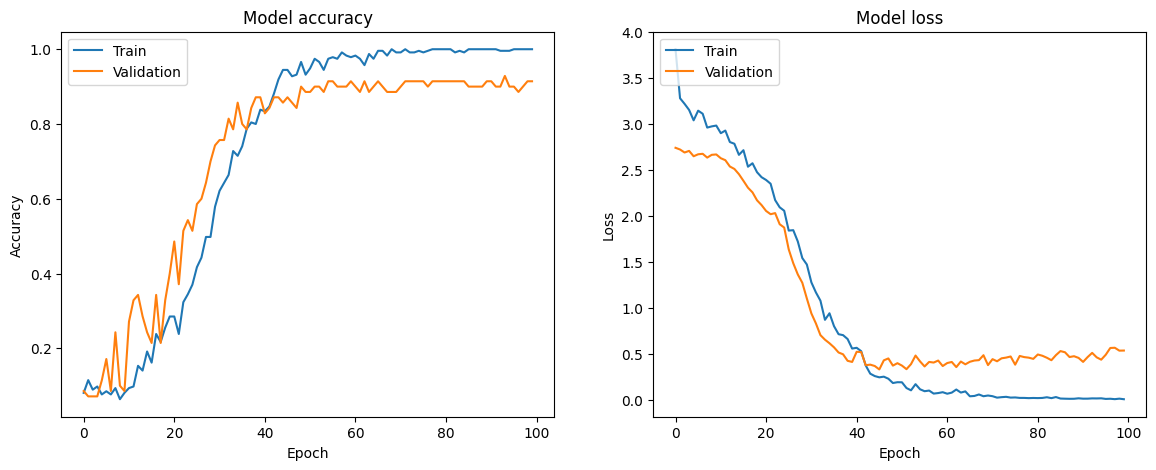

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
def tokenize_texts(texts, tokenizer, max_len=256):
    return tokenizer(
        texts,  # Directly use the list of texts
        max_length=max_len,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )


In [ ]:
def get_embeddings(texts, tokenizer, model, max_len= 256):
    tokens = tokenize_texts(texts, tokenizer, max_len)
    embeddings = model.predict([tokens['input_ids'], tokens['attention_mask']])
    return embeddings


In [ ]:
embeddings = get_embeddings(train_data['text'].tolist(), tokenizer, model)

input_text = "memiliki minat dan bakat dalam bidang penyimpanan, pengolahan, dan penyebaran informasi. Ini adalah jurusan yang cocok bagi mereka yang menyukai literasi, riset, teknologi informasi, dan pengelolaan database. Selain itu, jurusan ini juga cocok bagi mereka yang ingin berkarir di dunia perpustakaan, arsip, manajemen informasi, dan penerbitan. Dengan perkembangan pesat di era digital saat ini, lulusan jurusan ini memiliki banyak peluang kerja dan dapat berkontribusi dalam menyebarkan pengetahuan dan informasi kepada masyarakat secara efektif dan efisien."
input_embedding = get_embeddings([input_text], tokenizer, model)[0]

similarities = cosine_similarity([input_embedding], embeddings)[0]
# top_10_indices = similarities.argsort()[-10:][::-1]
top_10_indices = similarities.argsort()[-100:][::-1]

top_10_majors = train_data.iloc[top_10_indices]['highest']
top_5_unique = top_10_majors.unique()[:5]
columns_to_consider = ['Matematika', 'Sains', 'Fisika', 'Sosiologi', 'Biologi', 'Kimia',
                        'Teknologi','Bisnis dan Ekonomi', 'Seni', 'Sastra dan Linguistik',
                       'Pendidikan', 'Hukum', 'Lingkungan', 'Kesehatan', 'Geografi',
                       'Komunikasi', 'Sejarah dan Filsafat']

num_to_major = {i+1: columns_to_consider[i] for i in range(len(columns_to_consider))}

# Map the top 5 unique numbers to their corresponding names
top_5_majors_names = [num_to_major[num] for num in top_5_unique]
print("Top-10 recommended majors:")
print(top_5_majors_names)

1/1 [==============================] - 0s 155ms/step
Top-10 recommended majors:
['Teknologi', 'Matematika', 'Komunikasi', 'Seni', 'Sains']


In [ ]:
model.save('saved_model')

In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
with open('label_encoder.pkl', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!du -sh /content/saved_model


770M	/content/saved_model


In [ ]:
!zip -r models.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/saved_model.pb (deflated 93%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.index (deflated 77%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 29%)
  adding: saved_model/keras_metadata.pb (deflated 94%)


In [ ]:
tokenizer.save_pretrained('saved_tokenizer')

('saved_tokenizer/tokenizer_config.json',
 'saved_tokenizer/special_tokens_map.json',
 'saved_tokenizer/vocab.txt',
 'saved_tokenizer/added_tokens.json')

In [ ]:
!zip -r tokenizer.zip saved_tokenizer

  adding: saved_tokenizer/ (stored 0%)
  adding: saved_tokenizer/tokenizer_config.json (deflated 45%)
  adding: saved_tokenizer/special_tokens_map.json (deflated 42%)
  adding: saved_tokenizer/vocab.txt (deflated 53%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# !cp models.zip /content/drive/My\ Drive/
!cp models.zip /content/drive/My\ Drive/

In [ ]:
!cp tokenizer.zip /content/drive/My\ Drive/

In [ ]:
!cp /content/label_encoder.pkl /content/drive/My\ Drive/